In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# https://www.kaggle.com/code/gabenazario/wine-quality-classification-rdm-forest-keras

#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
data = pd.read_csv("~/datacsv/winequality-red.csv", sep=',')   #red wine UCI dataset

#dataw = pd.read_csv("~/datacsv/winequality-white.csv", sep=';')   #red wine UCI dataset

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#data1=data.dropna()

/Users/lana-n/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol'>

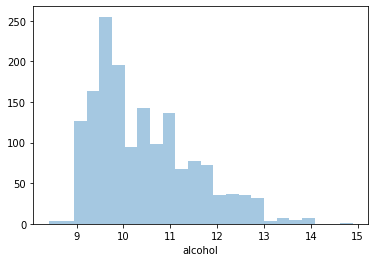

In [9]:
sns.distplot(data['alcohol'],kde=0)

In [10]:
y = data.quality
X = data.drop('quality', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [23]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

mc=MinMaxScaler()

X_train = mc.fit_transform( X_train)
X_test = mc.fit_transform( X_test)

In [18]:
#X
#X_train
#X_test

In [25]:
pipeline = make_pipeline(MinMaxScaler(),
                         RandomForestRegressor(n_estimators=100,
                                               random_state=123))

In [26]:
print( pipeline.get_params() )

{'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomforestregressor', RandomForestRegressor(random_state=123))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomforestregressor': RandomForestRegressor(random_state=123), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_impurity_split': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestreg

In [27]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [28]:

clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [29]:
print( clf.best_params_ )

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


In [31]:
print( clf.refit )

True


In [32]:
y_pred = clf.predict(X_test)

In [33]:

print( r2_score(y_test, y_pred) )

0.3192788909740303


In [34]:
print( mean_squared_error(y_test, y_pred) )

0.43925124999999987


In [35]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [36]:

clf2 = joblib.load('rf_regressor.pkl')
 
# Predict data set using loaded model
clf2.predict(X_test)

array([6.11, 5.37, 5.03, 5.4 , 5.88, 5.39, 5.06, 4.81, 5.16, 5.91, 5.07,
       5.51, 5.89, 5.03, 5.07, 5.52, 6.53, 5.51, 5.28, 6.65, 5.38, 5.06,
       4.97, 5.62, 6.31, 5.22, 5.02, 5.27, 6.03, 5.87, 5.66, 6.5 , 5.47,
       5.13, 4.95, 5.63, 5.07, 5.99, 4.85, 6.04, 4.92, 6.15, 6.64, 5.01,
       6.49, 5.33, 5.87, 5.19, 5.16, 6.02, 6.1 , 5.07, 5.89, 5.3 , 5.46,
       5.49, 5.24, 5.33, 5.18, 5.15, 5.48, 5.48, 5.33, 5.36, 6.07, 5.84,
       6.06, 5.52, 5.14, 5.95, 5.13, 5.7 , 5.1 , 5.32, 5.62, 6.07, 5.21,
       4.93, 5.88, 5.2 , 6.08, 5.48, 5.7 , 6.1 , 5.14, 5.92, 6.4 , 6.15,
       5.51, 5.71, 6.11, 5.35, 6.23, 5.31, 5.31, 5.51, 6.49, 6.7 , 5.19,
       6.43, 5.13, 5.46, 5.08, 6.19, 5.22, 4.85, 5.15, 5.14, 6.03, 5.89,
       5.58, 5.99, 5.73, 5.55, 5.19, 5.35, 5.61, 5.3 , 4.9 , 5.97, 5.48,
       5.27, 5.39, 6.13, 5.2 , 5.55, 5.36, 5.97, 6.36, 5.79, 5.71, 5.9 ,
       5.23, 5.29, 5.14, 6.34, 5.21, 5.21, 6.47, 5.54, 5.31, 5.15, 5.37,
       5.94, 5.28, 5.35, 4.99, 6.5 , 5.54, 4.94, 5.